In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data1 = pd.read_csv(r'C:\Users\sanga\Downloads\Air-Quality-predictor-of-kathmandu-main\data\raw\data.csv')
data2 = pd.read_csv(r'C:\Users\sanga\Downloads\Air-Quality-predictor-of-kathmandu-main\data\raw\data2.csv')

In [9]:
data1.head()

,time,pm10 (μg/m³),pm2_5 (μg/m³),carbon_monoxide (μg/m³),carbon_dioxide (ppm),nitrogen_dioxide (μg/m³),sulphur_dioxide (μg/m³),us_aqi (USAQI)
0,2022-08-05T00:00,31.7,22.2,478.0,NaN,14.1,5.2,58
1,2022-08-05T01:00,29.7,20.8,435.0,NaN,11.6,4.5,59
2,2022-08-05T02:00,25.3,17.7,374.0,NaN,8.2,3.5,59
3,2022-08-05T03:00,23.1,16.2,303.0,NaN,4.3,2.5,60
4,2022-08-05T04:00,20.3,14.2,272.0,NaN,2.9,2.0,60


In [10]:
data2.head()

,time,temperature_2m (°C),relative_humidity_2m (%),apparent_temperature (°C),wind_speed_10m (km/h),wind_speed_100m (km/h),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³)
0,2022-08-05T00:00,20.3,98.0,23.7,3.1,4.4,0.426,0.429
1,2022-08-05T01:00,21.0,96.0,24.8,1.8,3.0,0.425,0.428
2,2022-08-05T02:00,21.7,93.0,25.4,3.1,4.4,0.424,0.427
3,2022-08-05T03:00,23.2,86.0,27.0,3.1,4.0,0.423,0.426
4,2022-08-05T04:00,25.1,76.0,28.9,2.1,2.6,0.421,0.425


In [11]:
data2 = data2.drop(columns=["apparent_temperature (°C)", "wind_speed_100m (km/h)", "soil_moisture_7_to_28cm (m³/m³)"])
data1 = data1.drop(columns=["carbon_dioxide (ppm)"])




In [13]:
data1.head()

,time,pm10 (μg/m³),pm2_5 (μg/m³),carbon_monoxide (μg/m³),nitrogen_dioxide (μg/m³),sulphur_dioxide (μg/m³),us_aqi (USAQI)
0,2022-08-05T00:00,31.7,22.2,478.0,14.1,5.2,58
1,2022-08-05T01:00,29.7,20.8,435.0,11.6,4.5,59
2,2022-08-05T02:00,25.3,17.7,374.0,8.2,3.5,59
3,2022-08-05T03:00,23.1,16.2,303.0,4.3,2.5,60
4,2022-08-05T04:00,20.3,14.2,272.0,2.9,2.0,60


In [15]:
# Merge both datasets on 'time' column
merged_df = pd.merge(data1, data2, on="time", how="inner")  # 'inner' ensures only matching timestamps are kept
merged_df.head()

,time,pm10 (μg/m³),pm2_5 (μg/m³),carbon_monoxide (μg/m³),nitrogen_dioxide (μg/m³),sulphur_dioxide (μg/m³),us_aqi (USAQI),temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³)
0,2022-08-05T00:00,31.7,22.2,478.0,14.1,5.2,58,20.3,98.0,3.1,0.426
1,2022-08-05T01:00,29.7,20.8,435.0,11.6,4.5,59,21.0,96.0,1.8,0.425
2,2022-08-05T02:00,25.3,17.7,374.0,8.2,3.5,59,21.7,93.0,3.1,0.424
3,2022-08-05T03:00,23.1,16.2,303.0,4.3,2.5,60,23.2,86.0,3.1,0.423
4,2022-08-05T04:00,20.3,14.2,272.0,2.9,2.0,60,25.1,76.0,2.1,0.421


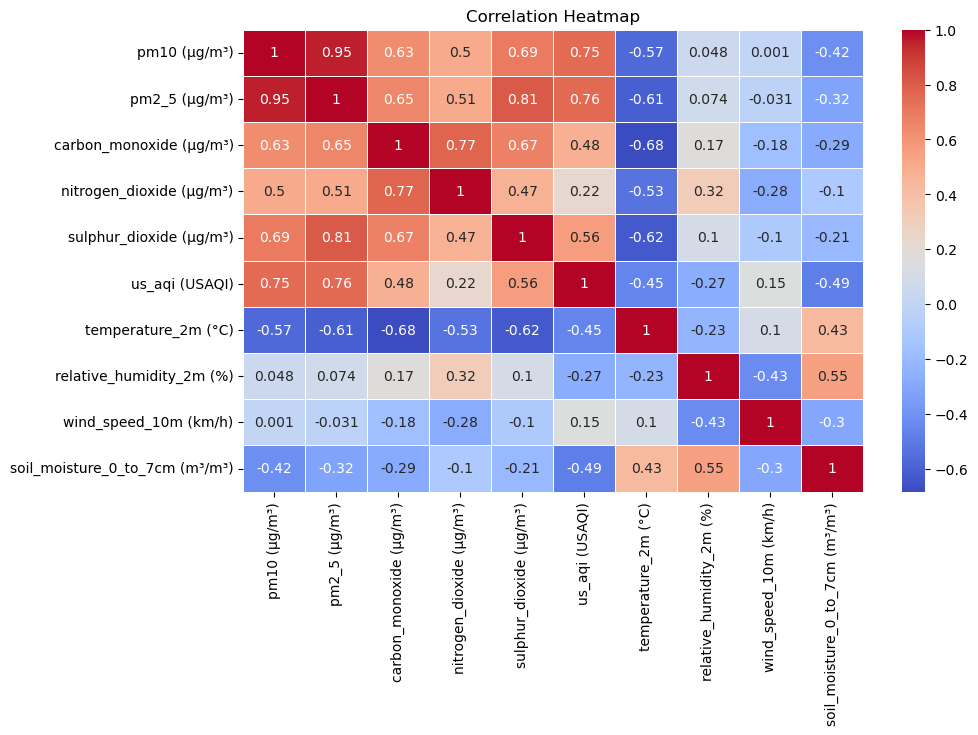

In [16]:
# Drop the 'time' column before computing the correlation matrix
df_numeric = merged_df.drop(columns=['time'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [17]:
merged_df['AQI'] = merged_df['us_aqi (USAQI)']

In [19]:
merged_df.head()

,time,pm10 (μg/m³),pm2_5 (μg/m³),carbon_monoxide (μg/m³),nitrogen_dioxide (μg/m³),sulphur_dioxide (μg/m³),us_aqi (USAQI),temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),AQI
0,2022-08-05T00:00,31.7,22.2,478.0,14.1,5.2,58,20.3,98.0,3.1,0.426,58
1,2022-08-05T01:00,29.7,20.8,435.0,11.6,4.5,59,21.0,96.0,1.8,0.425,59
2,2022-08-05T02:00,25.3,17.7,374.0,8.2,3.5,59,21.7,93.0,3.1,0.424,59
3,2022-08-05T03:00,23.1,16.2,303.0,4.3,2.5,60,23.2,86.0,3.1,0.423,60
4,2022-08-05T04:00,20.3,14.2,272.0,2.9,2.0,60,25.1,76.0,2.1,0.421,60


In [20]:
merged_df = merged_df.drop(columns=["us_aqi (USAQI)"])


In [22]:
merged_df.head()

,time,pm10 (μg/m³),pm2_5 (μg/m³),carbon_monoxide (μg/m³),nitrogen_dioxide (μg/m³),sulphur_dioxide (μg/m³),temperature_2m (°C),relative_humidity_2m (%),wind_speed_10m (km/h),soil_moisture_0_to_7cm (m³/m³),AQI
0,2022-08-05T00:00,31.7,22.2,478.0,14.1,5.2,20.3,98.0,3.1,0.426,58
1,2022-08-05T01:00,29.7,20.8,435.0,11.6,4.5,21.0,96.0,1.8,0.425,59
2,2022-08-05T02:00,25.3,17.7,374.0,8.2,3.5,21.7,93.0,3.1,0.424,59
3,2022-08-05T03:00,23.1,16.2,303.0,4.3,2.5,23.2,86.0,3.1,0.423,60
4,2022-08-05T04:00,20.3,14.2,272.0,2.9,2.0,25.1,76.0,2.1,0.421,60


In [24]:
# Rename columns with shorter names
merged_df = merged_df.rename(columns={
    'time': 'time',
    'pm10 (μg/m³)': 'PM10 (μg/m³)',
    'pm2_5 (μg/m³)': 'PM2.5 (μg/m³)',
    'carbon_monoxide (μg/m³)': 'CO (μg/m³)',
    'nitrogen_dioxide (μg/m³)': 'NO2 (μg/m³)',
    'sulphur_dioxide (μg/m³)': 'SO2 (μg/m³)',
    'temperature_2m (°C)': 'Temp (°C)',
    'relative_humidity_2m (%)': 'Humidity (%)',
    'wind_speed_10m (km/h)': 'Wind_Speed (km/h)',
    'soil_moisture_0_to_7cm (m³/m³)': 'Soil_Moisture (m³/m³)',
    'AQI': 'AQI'
})

In [26]:
merged_df.head()

,time,PM10 (μg/m³),PM2.5 (μg/m³),CO (μg/m³),NO2 (μg/m³),SO2 (μg/m³),Temp (°C),Humidity (%),Wind_Speed (km/h),Soil_Moisture (m³/m³),AQI
0,2022-08-05T00:00,31.7,22.2,478.0,14.1,5.2,20.3,98.0,3.1,0.426,58
1,2022-08-05T01:00,29.7,20.8,435.0,11.6,4.5,21.0,96.0,1.8,0.425,59
2,2022-08-05T02:00,25.3,17.7,374.0,8.2,3.5,21.7,93.0,3.1,0.424,59
3,2022-08-05T03:00,23.1,16.2,303.0,4.3,2.5,23.2,86.0,3.1,0.423,60
4,2022-08-05T04:00,20.3,14.2,272.0,2.9,2.0,25.1,76.0,2.1,0.421,60


In [27]:
merged_df['Date'] = pd.to_datetime(merged_df['time']).dt.date
merged_df['Time'] = pd.to_datetime(merged_df['time']).dt.time

# Drop the original 'time' column if it's no longer needed
merged_df = merged_df.drop(columns=['time'])
columns = ['Date', 'Time'] + [col for col in merged_df.columns if col not in ['Date', 'Time']]
merged_df = merged_df[columns]

In [29]:
merged_df.head()

,Date,Time,PM10 (μg/m³),PM2.5 (μg/m³),CO (μg/m³),NO2 (μg/m³),SO2 (μg/m³),Temp (°C),Humidity (%),Wind_Speed (km/h),Soil_Moisture (m³/m³),AQI
0,2022-08-05,00:00:00,31.7,22.2,478.0,14.1,5.2,20.3,98.0,3.1,0.426,58
1,2022-08-05,01:00:00,29.7,20.8,435.0,11.6,4.5,21.0,96.0,1.8,0.425,59
2,2022-08-05,02:00:00,25.3,17.7,374.0,8.2,3.5,21.7,93.0,3.1,0.424,59
3,2022-08-05,03:00:00,23.1,16.2,303.0,4.3,2.5,23.2,86.0,3.1,0.423,60
4,2022-08-05,04:00:00,20.3,14.2,272.0,2.9,2.0,25.1,76.0,2.1,0.421,60


In [30]:
columns_to_fill = ['Temp (°C)', 'Humidity (%)', 'Wind_Speed (km/h)','Soil_Moisture (m³/m³)']

merged_df[columns_to_fill] = merged_df[columns_to_fill].apply(lambda col: col.fillna(col.mean())) 


In [33]:
# Combine 'Date' and 'Time' columns into a single datetime column
merged_df['Datetime'] = pd.to_datetime(merged_df['Date'].astype(str) + ' ' + merged_df['Time'].astype(str))

# Drop the original 'Date' and 'Time' columns
merged_df = merged_df.drop(columns=['Date', 'Time'])

# Save the processed data to the specified folder
processed_file_path = r'C:\Users\sanga\Downloads\Air-Quality-predictor-of-kathmandu-main\data\processed\processed_data_with_datetime.csv'
merged_df.to_csv(processed_file_path, index=False)